In [1]:
import pandas as pd
import numpy as np
import random
from numpy.random import randint
from random import random as rnd
from random import gauss, randrange

The firt two rows of dataset:
      I1   I2  I3  I4  I5  I6   I7  I8      TO
0  0.09  600  63   1  20   5  5.2  10  112.08
1  0.09  600  98   2  25   6  5.4  15   99.75
The shape of dataset:
 (59, 9)
No. of training patterns:
 59
Input array includes first 8 columns of dataset:
 [[9.00e-02 6.00e+02 6.30e+01 1.00e+00 2.00e+01 5.00e+00 5.20e+00 1.00e+01]
 [9.00e-02 6.00e+02 9.80e+01 2.00e+00 2.50e+01 6.00e+00 5.40e+00 1.50e+01]
 [9.00e-02 6.00e+02 1.32e+02 4.00e+00 3.00e+01 7.00e+00 5.60e+00 2.00e+01]
 [9.00e-02 6.00e+02 2.00e+02 3.00e+00 3.50e+01 8.00e+00 5.80e+00 2.50e+01]
 [9.00e-02 8.15e+02 6.30e+01 1.00e+00 2.50e+01 6.00e+00 5.60e+00 2.00e+01]
 [9.00e-02 8.15e+02 9.80e+01 2.00e+00 2.00e+01 5.00e+00 5.80e+00 2.50e+01]
 [9.00e-02 8.15e+02 1.32e+02 4.00e+00 3.50e+01 8.00e+00 5.20e+00 1.00e+01]
 [9.00e-02 8.15e+02 2.00e+02 3.00e+00 3.00e+01 7.00e+00 5.40e+00 1.50e+01]
 [9.00e-02 1.10e+03 6.30e+01 2.00e+00 3.00e+01 8.00e+00 5.20e+00 1.50e+01]
 [9.00e-02 1.10e+03 9.80e+01 1.00e+00 3.50e+0

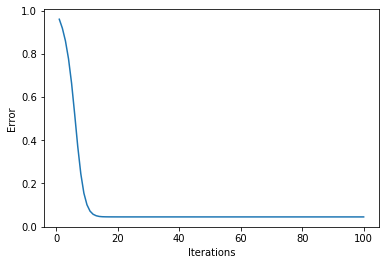

The final normalized outputs are: [[0.13517631]
 [0.13646077]
 [0.13752626]
 [0.13928673]
 [0.13382452]
 [0.13375163]
 [0.13695967]
 [0.13743162]
 [0.13355661]
 [0.1347983 ]
 [0.1334849 ]
 [0.1351104 ]
 [0.13251769]
 [0.13301427]
 [0.13319933]
 [0.13403333]
 [0.13448056]
 [0.13553618]
 [0.13839855]
 [0.13988502]
 [0.13449917]
 [0.13452879]
 [0.13618226]
 [0.13679598]
 [0.13281982]
 [0.13415937]
 [0.13410118]
 [0.13579349]
 [0.13280746]
 [0.13319485]
 [0.13300918]
 [0.13374643]
 [0.13645136]
 [0.13374162]
 [0.1337357 ]
 [0.13633746]
 [0.13379872]
 [0.13385583]
 [0.13649575]
 [0.13507228]
 [0.13502999]
 [0.13655272]
 [0.13487794]
 [0.13371011]
 [0.13665413]
 [0.13495395]
 [0.13492021]
 [0.13659714]
 [0.13499623]
 [0.13382432]
 [0.1363944 ]
 [0.13483568]
 [0.13367861]
 [0.13643879]
 [0.13491168]
 [0.13376721]
 [0.13654016]
 [0.13498771]
 [0.13379281]]


In [3]:
# Displays first 5 rows
data = pd.read_csv('data.txt', delimiter= '\s+', header=None)
data.columns = ['I1', 'I2', 'I3','I4','I5','I6','I7','I8','TO']
print('The firt two rows of dataset:\n',data.head(2)) 
print('The shape of dataset:\n',data.shape)

# Training patterns
P = 59  # I've taken entire dataset
print ('No. of training patterns:\n', P)

# Converting given data type to Array
arr=data.to_numpy()
I=arr[:P,:8]
print('Input array includes first 8 columns of dataset:\n',I)
O=arr[:P,8:]
print('Target output array includes last column of dataset:\n',O)

# Learning and momentum rate
eta=0.3
alpha=0.2

# Bias for hidden and output layer
B=np.zeros((1,2))

# Number of hidden neurons and size of weight matrix 
l1=int(len(I[0]))
l2=3 
l3=int(len(O[0]))

# Random weights generated 
V=np.random.randn(l1+1,l2)  # +1 for bias
W=np.random.randn(l2+1,l3)  # +1 for bias

# Empty list created to store error
abs_error=[]

# Loop for iterations
max_iter = 100

for i in range(max_iter): 

    sumW=np.zeros((l2+1,l3))
    dwi=np.zeros((l2+1,l3))

    sumV=np.zeros((l1+1,l2))
    dvi=np.zeros((l1+1,l2))

    sumE=np.zeros((1,l3))
    Hi=np.zeros((P,l2))
    Ho=np.zeros((P,l2))
    Oi=np.zeros((P,l3))
    Oo=np.zeros((P,l3))

    # Normalization
    Min=np.zeros((P,1))
    Max=np.zeros((P,1))
    for i in range(P):
        Min[i]=np.min(arr[i])
        Max[i]=np.max(arr[i])    
    for i in range(P):
        for j in range(len(arr[0])):   
            arr[i][j]=(arr[i][j]-Min[i])/(Max[i]-Min[i])

    Bias1=np.ones((P,1))*B[:1,:1]
    Bias2=np.ones((P,1))*B[:1,:1]
    I_norm=arr[:P,:8]
    I_norm=np.concatenate((I_norm,Bias1),axis=1)
    O_norm=arr[:P,8:]

    # Input to hidden neurons and output of hidden neurons
    for i in range(P):
        Hi[i]=I_norm[i].dot(V)
        Ho[i]= 1/(1+np.exp(-Hi[i]))    
    Ho=np.concatenate((Ho,Bias2),axis=1)
    
    # Input to output neuron and output of output neuron
    for i in range(P):
        Oi[i]=Ho[i].dot(W)
        Oo[i]=(np.exp(Oi[i])-np.exp(-Oi[i]))/(np.exp(Oi[i])+np.exp(-Oi[i]))  
    
    # Weights between hidden and output neuron
    for p in range(P):    
        for j in range(l2+1):
            for k in range(l3):
                sumW[j,k]=sumW[j,k]+(-1)*(O_norm[p,k]-Oo[p,k])*(1+Oo[p,k])*(1-Oo[p,k])*Ho[p,j]
    
    # Weights between input and hidden neuron
    for p in range(P): 
        for i in range(l1+1):
            for j in range(l2):
                for k in range(l3):
                    sumV[i,j]=sumV[i,j]+(-1)*(O_norm[p,k]-Oo[p,k])*(1+Oo[p,k])*(1-Oo[p,k])*W[j,k]*Ho[p,j]*(1-Ho[p,j])*I_norm[p,i]         
    # Error calculation
    absum=0
    for p in range(P): 
        for k in range(l3):
            absum=absum+np.abs(Oo[p,k]-O_norm[p,k])
    
    # Weight updation
    dw=(-eta/P)*sumW
    W=W+(dw)+alpha*dwi
    dwi=dw       
    dv=(-eta/P)*sumV;
    V=V+(dv)+alpha*dvi
    dvi=dv
    abs_error.append(absum/P)
    
iters=np.arange(1,max_iter+1,1)    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(iters,abs_error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()